## Connect to **Google Drive with Python**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Steps how to run Julia
1.   Run the first block and install Julia Kernel
2.   Go to notebook settings
3.   Select Julia 1.5 again as runtime



## Installing **Julia** on **Google Colab**

In [2]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.3-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; add Plots; precompile"'
!echo "DONE"

 Installing known registries into `~/.julia`
######################################################################## 100.0%
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Parsers ───────── v1.0.14
  Installed SoftGlobalScope ─ v1.1.0
  Installed VersionParsing ── v1.2.0
  Installed ZeroMQ_jll ────── v4.3.2+5
  Installed IJulia ────────── v1.23.1
  Installed Conda ─────────── v1.5.0
  Installed MbedTLS ───────── v1.0.3
  Installed JSON ──────────── v0.21.1
  Installed JLLWrappers ───── v1.1.3
  Installed ZMQ ───────────── v1.2.1
  Installed Artifacts ─────── v1.3.0
  Installed MbedTLS_jll ───── v2.16.8+1
######################################################################## 100.0%
######################################################################## 100.0%
Updating `~/.julia/environments/v1.5/Project.toml`
  [7073ff75] + IJulia v1.23.1
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [56f22d72] + Artifacts v1.3.0
  

#**Julia Code**#

In [1]:
println("Version of Julia: ", VERSION);

Version of Julia: 1.5.1


## **Including libraries**

### Including Google Drive's library with Runge-Kutta Method

In [2]:
cd("/content/drive/My Drive/Work/Programming/Colab Notebooks/RungeKutta"); # your folder in Google Drive
pwd()
#readdir()

"/content/drive/My Drive/Work/Programming/Colab Notebooks/RungeKutta"

In [2]:
include("./RK.jl")
using .RK

In [4]:
using Plots

### To solve integro-differential equations with discrete delays use the function "ide_delay_solve". If there are no such delays, use "ide_solve"

## Definition of functions for output 

In [5]:
# Output numerical solution in the end
function Output()
    nz = length(history(tspan[1]));
    if nz == 1
        println("y(",tspan[2],") = ",sol[2][end]);
    else
        for i = 1 : nz
            println("y",i,"(",tspan[2],") = ",(sol[2]')[end-nz+i]);
        end
    end
end

# Check 4-order of examples
# 1 - if equation has discrete delays z, 0 - if otherwise
function err_calc(hasDelays)
    n      = 8;
    err    = zeros(n);
    nsteps = zeros(n);

    for steppow = 1:n
        stepsize = (2.0)^(-steppow);
        
        if hasDelays == 1
            sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize);
        else
            sol = ide_solve(idefun,K,delays_int,history,tspan,stepsize);
        end

        err[steppow] = abs(true_sol - sol[2][end]);
        nsteps[steppow] = stepsize;
    end

    println("Convergence order: ",(log10(err[end-1])-log10(err[end]))/(log10((2.0)^(-n+1))-log10((2.0)^(-n))));

    p2 = plot(err, nsteps, xaxis=:log10, yaxis=:log10, xlabel="ERROR", ylabel="STEPSIZE",legend=false, title = "Convergence order");

    plot(p1, p2, layout=(2,1), size = (600, 800))
end

err_calc (generic function with 1 method)

## Example 1 (only integral)

y(5.0) = 148.41315925335257
Convergence order: 4.001770395412852


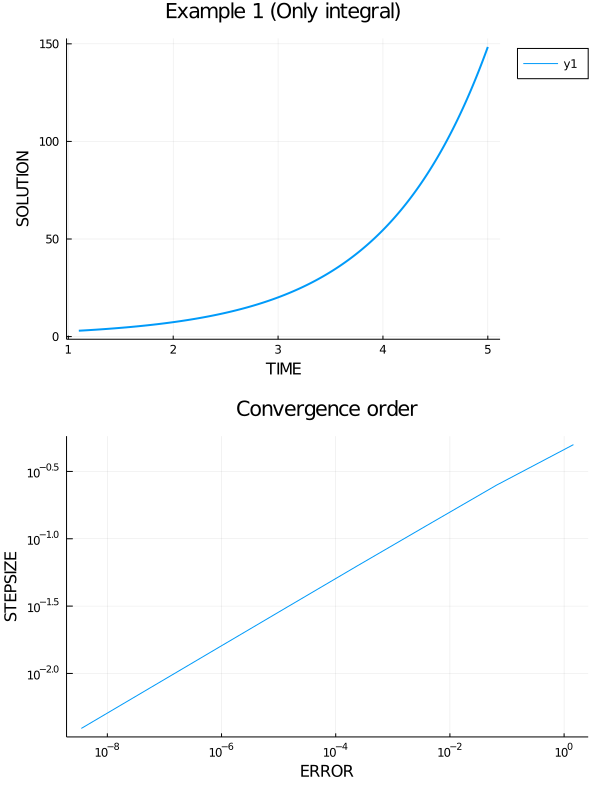

In [6]:
tspan = [1.1 5];
idefun(t,y,i) = ((t-1)*exp(t*t)*i)/(exp(-1)*y[1]-1);
K(t,s,y)      = y*exp(-s*t);
delays_int(t) = t-1; # delays of integrals
history(t)    = exp(t);

sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);

# Output vector of times t     #print(sol[1])
# Output vector of solutions y #print(sol[2])
Output();

p1 = plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 1 (Only integral)", legend=:outertopright);

# Check 4-order of Example 1
function fun(t)
    return exp(t);
end
true_sol = fun(tspan[end]);

# 1 - if equation has discrete delays z, 0 - if otherwise
err_calc(0) 

## Example 2 (integral+discrete delays)

y(10) = -0.8390715237122065
Convergence order: 3.9942597131307522


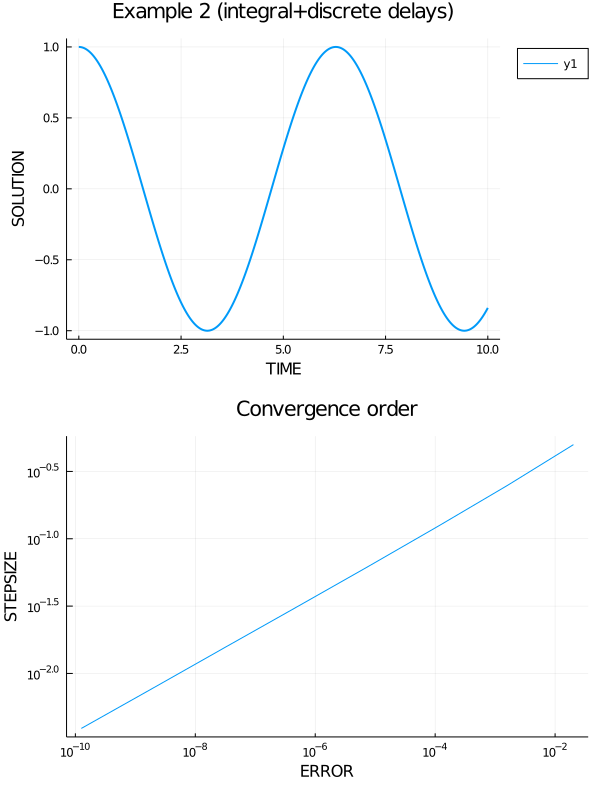

In [7]:
tspan = [0 10];
idefun(t,y,z,i) = (1+exp(-pi/2))*y-exp(-pi/2)*z-2*exp(-2*t)*i;
K(t,s,y)        = y*exp(t+s); 
delays(t,y)     = t-pi/2;
delays_int(t)   = t-pi/2;
history(t)      = cos(t);

sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2);

Output();

p1 = plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 2 (integral+discrete delays)", legend=:outertopright);

# Check 4-order of Example 2
function fun(t)
    return cos(t);
end
true_sol = fun(tspan[end]);

err_calc(1)

## Example 3 (integral+discrete delays+overlapping)

y(5) = 0.006737946981458055
Convergence order: 3.994896598918342


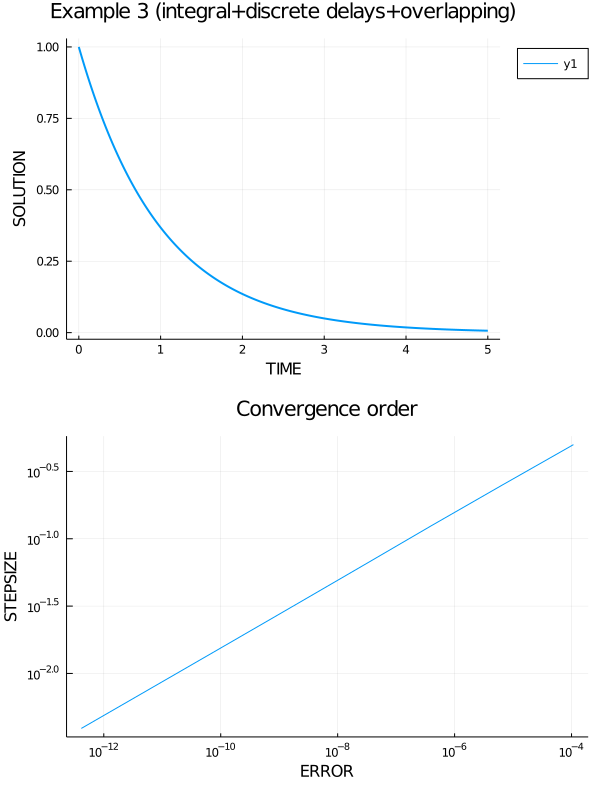

In [8]:
tspan = [0 5];
idefun(t,y,z,i) = -y.^2-t*exp(t^2)*z^4*i;
K(t,s,y)        = y*exp(s-s*t); 
delays(t,y)     = t/2;
delays_int(t)   = t-1;
history(t)      = exp(-t);

sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2);

Output();

p1 = plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 3 (integral+discrete delays+overlapping)", legend=:outertopright);

# Check 4-order of Example 3
function fun(t)
    return exp(-t);
end
true_sol = fun(tspan[end])

err_calc(1)

## Example 4 (2 integrals)

y(5) = 148.41315915325345
Convergence order: 3.992936102301642


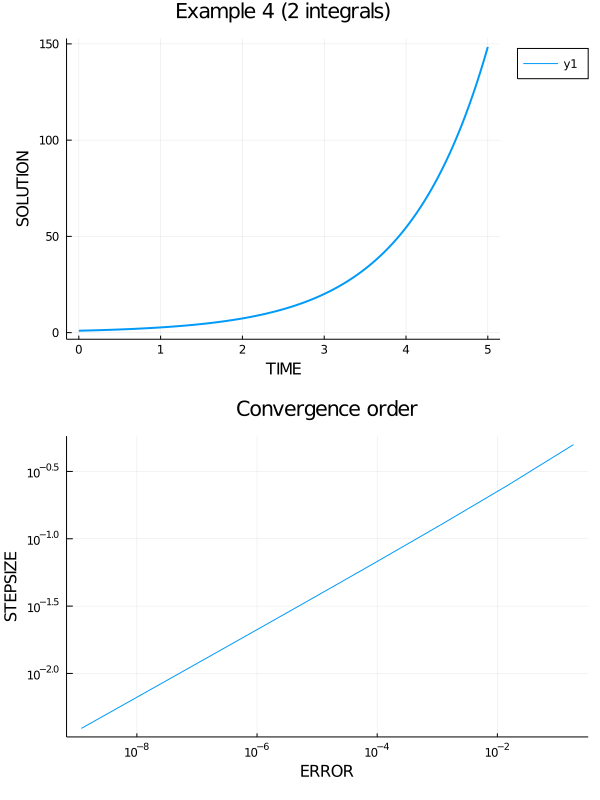

In [9]:
tspan = [0 5];
idefun(t,y,z,i) = exp(1)-exp(t^2)/(z[1]^2)*(i[1]-exp(-2*t)*i[2])*(t-1);
K(t,s,y)        = [ y*exp(-s*t);
                    y*exp(t*(2-s))];
delays(t,y)     = t-1;
delays_int(t)   = [ t-1;
                    t-2 ];
history(t)      = exp(t);

sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2);

Output();

p1 = plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 4 (2 integrals)", legend=:outertopright);

# Check 4-order of Example 4
function fun(t)
    return exp(t);
end
true_sol = fun(tspan[end])

err_calc(1)

## Example 5 (2 discrete delays + *State-dependent*)

y(5) = 0.006737947029428378
Convergence order: 4.034954918091005


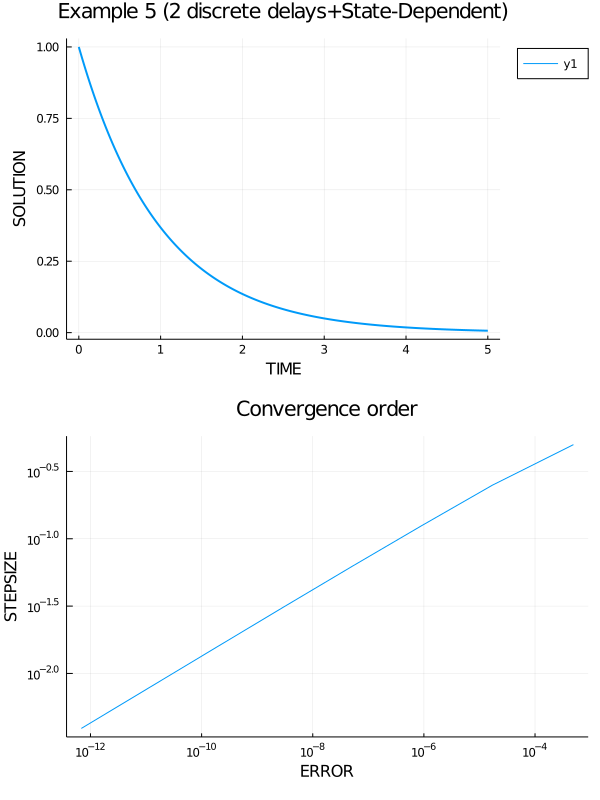

In [10]:
tspan = [0 5];
idefun(t,y,z,i) = -z[1]^((t+1)/2) * z[2] * y.^2 * (1+exp(t^2)*t*i[1]) / exp(1/2);
K(t,s,y)        = y*exp(s-s*t);
delays(t,y)     = [ (log(y[1]))^2 / (t+1) - 1/2;
                    (t-1) / 4 ];
delays_int(t)   = t/2-1;
history(t)      = exp(-t);

sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2);

Output();

p1 = plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 5 (2 discrete delays+State-Dependent)", legend=:outertopright);

# Check 4-order of Example 5
function fun(t)
    return exp(-t);
end
true_sol = fun(tspan[end])

err_calc(1)

## Example 6 (system of equations)



y1(10) = 0.004329876789507738
y2(10) = -9.145191243883074
y3(10) = 22.026465794883663


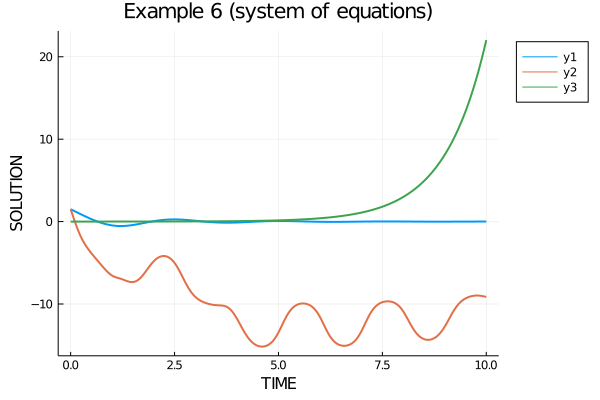

In [11]:
tspan = [0 10];
idefun(t,y,i) = [ -2.5*i[1];
                   -15*i[2];
                  0.001*exp(t)];
K(t,s,y)      = [ sin(y[1]);
                  sin(y[2])];
delays_int(t) = [ t-1;
                  t-1 ];
history(t)    = [ 1.5;
                  1.5;
                  0.001*exp(t)];

sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);

Output();

plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 6 (system of equations)", legend=:outertopright)

## Examples (Yukihiko)

y(25) = -2.0422322798209653


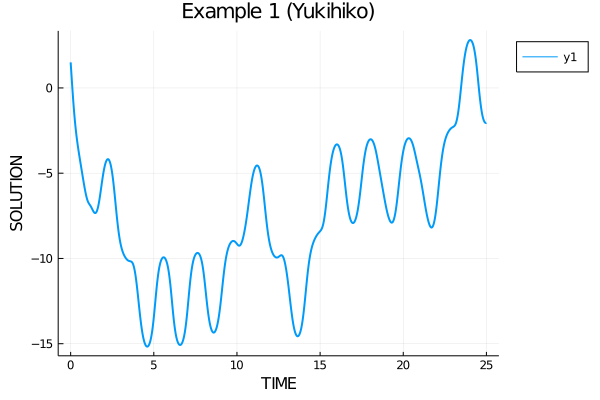

In [12]:
tspan = [0 25];
idefun(t,y,i) = -15*i;
K(t,s,y)      = sin(y); 
delays_int(t) = t-1;
history(t)    = 1.5;

sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);

Output();

plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 1 (Yukihiko)", legend=:outertopright)

y(25) = -1.216745086566776


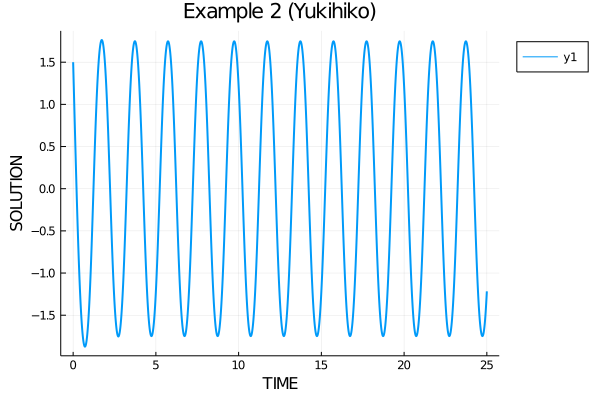

In [13]:
idefun(t,y,i) = -7.5*i;
sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);
Output();
plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 2 (Yukihiko)", legend=:outertopright)

y(25) = 8.176591500707333e-7


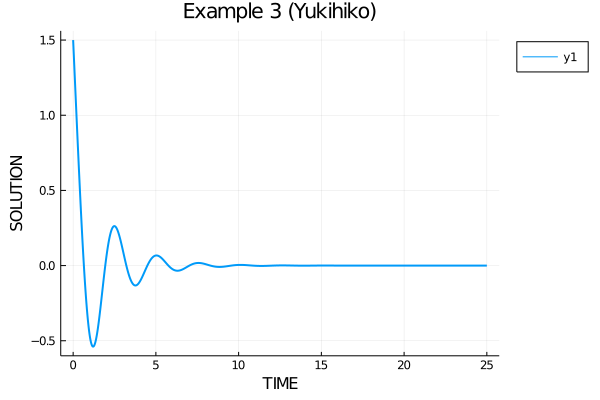

In [14]:
idefun(t,y,i) = -2.5*i;
sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);
Output();
plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="Example 3 (Yukihiko)", legend=:outertopright)

y1(25) = 8.176591500707333e-7
y2(25) = -1.216745086566776
y3(25) = -2.0422322798209653


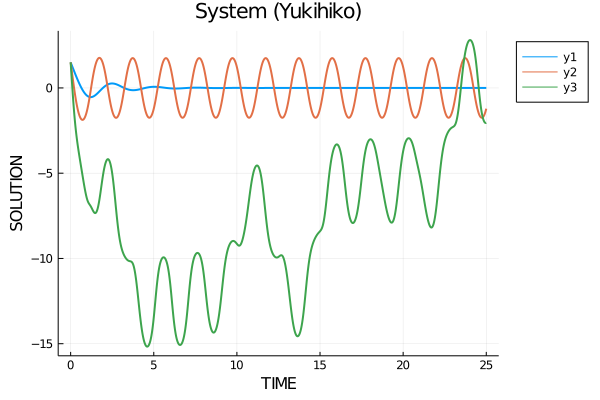

In [15]:
tspan = [0 25];
idefun(t,y,i) = [ -2.5*i[1];
                  -7.5*i[2];
                   -15*i[3] ];
K(t,s,y)      = [ sin(y[1]);
                  sin(y[2]);
                  sin(y[3]) ];
delays_int(t) = [ t-1;
                  t-1;
                  t-1 ]; 
history(t)    = [ 1.5;
                  1.5;
                  1.5 ];

sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2);

Output();
plot(sol, linewidth=2, xlabel="TIME", ylabel="SOLUTION", title="System (Yukihiko)", legend=:outertopright)

## Speed test (5 examples)



In [16]:
stepsize = 1e-3;

In [17]:
tspan = [1.1 5];
idefun(t,y,i) = ((t-1)*exp(t*t)*i)/(exp(-1)*y[1]-1);
K(t,s,y)      = y*exp(-s*t);
delays_int(t) = t-1; # delays of integrals
history(t)    = exp(t);

print("Elapsed time:")
@time sol = ide_solve(idefun,K,delays_int,history,tspan,stepsize);

Output();

Elapsed time: 34.672969 seconds (325.81 M allocations: 16.216 GiB, 8.04% gc time)
y(5.0) = 148.41315910257708


In [18]:
tspan = [0 5];
idefun(t,y,z,i) = -y.^2-t*exp(t^2)*z^4*i;
K(t,s,y)        = y*exp(s-s*t); 
delays(t,y)     = t/2;
delays_int(t)   = t-1;
history(t)      = exp(-t);

print("Elapsed time:")
@time sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize);

Output();

Elapsed time: 51.019810 seconds (450.87 M allocations: 22.054 GiB, 7.74% gc time)
y(5) = 0.006737946999098351


In [19]:
tspan = [0 5];
idefun(t,y,z,i) = exp(1)-exp(t^2)/(z[1]^2)*(i[1]-exp(-2*t)*i[2])*(t-1);
K(t,s,y)        = [ y*exp(-s*t);
                    y*exp(t*(2-s))];
delays(t,y)     = t-1;
delays_int(t)   = [ t-1;
                    t-2 ];
history(t)      = exp(t);

print("Elapsed time:")
@time sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize);

Output();

Elapsed time:146.308308 seconds (1.37 G allocations: 66.006 GiB, 7.96% gc time)
y(5) = 148.41315910255597


In [20]:
tspan = [0 5];
idefun(t,y,z,i) = -z[1]^((t+1)/2) * z[2] * y.^2 * (1+exp(t^2)*t*i[1]) / exp(1/2);
K(t,s,y)        = y*exp(s-s*t);
delays(t,y)     = [ (log(y[1]))^2 / (t+1) - 1/2;
                    (t-1) / 4 ];
delays_int(t)   = t/2-1;
history(t)      = exp(-t);

print("Elapsed time:")
@time sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize);

Output();

Elapsed time:112.805044 seconds (1.02 G allocations: 49.078 GiB, 7.74% gc time)
y(5) = 0.006737946999088437


In [21]:
tspan = [0 10];
idefun(t,y,i) = [ -2.5*i[1];
                     -15*i[2];
                    0.001*exp(t)];
K(t,s,y)      = [ sin(y[1]);
                  sin(y[2])];
delays_int(t) = [ t-1;
                  t-1 ];
history(t)    = [ 1.5;
                  1.5;
                  0.001*exp(t)];

print("Elapsed time:")
@time sol = ide_solve(idefun,K,delays_int,history,tspan,stepsize);

Output();

Elapsed time:327.316077 seconds (2.03 G allocations: 121.474 GiB, 12.05% gc time)
y1(10) = 0.004329876785625872
y2(10) = -9.145131176514756
y3(10) = 22.026465794816332
